In [5]:
import numpy as np
import pandas as pd

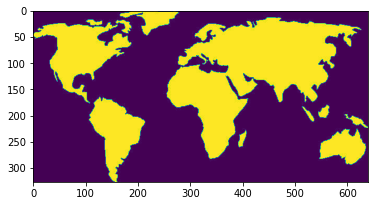

In [20]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('Datasets/images/chapter 2/world_image_binary.jpg')

# Display the image
plt.imshow(data)
plt.show()

In [8]:
labels= ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [13]:
test_labels = np.array([[0., 0., 1.],
                       [0., 1., 0.],
                       [0., 0., 1.],
                       [0., 1., 0.],
                       [0., 0., 1.],
                       [0., 0., 1.],
                       [0., 0., 1.],
                       [0., 1., 0.]])
predictions = np.array([[0., 0., 1.],
                       [0., 1., 0.],
                       [0., 0., 1.],
                       [1., 0., 0.],
                       [0., 0., 1.],
                       [1., 0., 0.],
                       [0., 0., 1.],
                       [0., 1., 0.]])

In [14]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

6.0
0.75


In [ ]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

In [ ]:
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

## 2) Using Convolutions

In [15]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [21]:
print(data.shape)
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(data.shape)

# Output array
for ii in range(data.shape[0] - 3):
    for jj in range(data.shape[1] - 3):
        result[ii, jj] = (data[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

(327, 640)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1 ,-1]])

In [ ]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

In [ ]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10)